### Principal Component Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits
digit_dataset = load_digits()

In [4]:
dir(digit_dataset)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
digit_dataset.DESCR.splitlines()

['Optical Recognition of Handwritten Digits Data Set',
 '===================================================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 5620',
 '    :Number of Attributes: 64',
 '    :Attribute Information: 8x8 image of integer pixels in the range 0..16.',
 '    :Missing Attribute Values: None',
 "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)",
 '    :Date: July; 1998',
 '',
 'This is a copy of the test set of the UCI ML hand-written digits datasets',
 'http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits',
 '',
 'The data set contains images of hand-written digits: 10 classes where',
 'each class refers to a digit.',
 '',
 'Preprocessing programs made available by NIST were used to extract',
 'normalized bitmaps of handwritten digits from a preprinted form. From a',
 'total of 43 people, 30 contributed to the training set and different 13',
 'to the test set. 32x32 bitmaps are divided into non

In [6]:
digit_dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

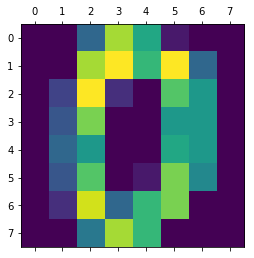

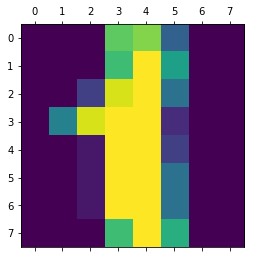

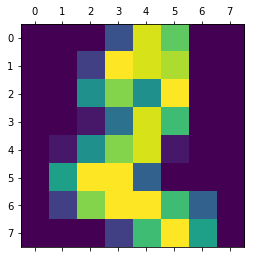

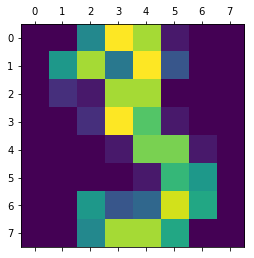

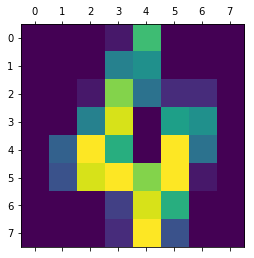

In [8]:
for i in range(5):
    plt.matshow(digit_dataset.images[i])

In [9]:
digit_dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
digit_dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

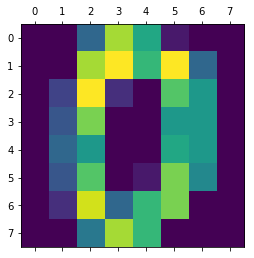

In [13]:
plt.matshow(digit_dataset.data[0].reshape(8,8))

In [14]:
df = pd.DataFrame(digit_dataset.data)

In [15]:
df.shape

(1797, 64)

In [16]:
X = df
y = digit_dataset.target

In [17]:
print(X.shape, y.shape)

(1797, 64) (1797,)


In [21]:
print(X.max()[:5])
print(X.min()[:5])
print(X.median()[:5])

0     0.0
1     8.0
2    16.0
3    16.0
4    16.0
dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64
0     0.0
1     0.0
2     4.0
3    13.0
4    13.0
dtype: float64


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1437, 64) (360, 64) (1437,) (360,)


In [26]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(X_train, y_train)
mdl.score(X_test, y_test)

0.9666666666666667

In [29]:
# PCA (Dimention Reduction Technique)

from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [31]:
pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814,  21.32435654,  17.63672222,  16.94686385,
        15.85138991,  15.00446022,  12.23447318,  10.88685932,
        10.69356625,   9.58259779,   9.2264026 ,   8.69036872,
         8.3656119 ,   7.16577961,   6.91973881,   6.19295508,
         5.88499123])

In [32]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [33]:
pca.n_components_

29

In [34]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression(max_iter=1000)
mdl.fit(X_train_pca, y_train_pca)
mdl.score(X_test_pca, y_test_pca)

0.9638888888888889

In [37]:
# Let's select only 2 component using pca

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [38]:
X_pca.shape

(1797, 2)

In [39]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [40]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression(max_iter=1000)
mdl.fit(X_train_pca, y_train_pca)
mdl.score(X_test_pca, y_test_pca)

0.6194444444444445